### <font color ='green'>Дополнительные задание для работы с курсовым проектом</font>

Задание 1

Постановка задачи
Требуется на основании демографических данных о клиентах банка, истории их платежей и состоянии счета, предсказать невыполнение их обязательств по кредитной карте в следующем месяце.

Скачать данные из соревнования, пока можете работать только с train.csv. Считать их.

Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения). Сделать выводы об адекватности этих статистик.

Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются. Сделать выводы по каждому признаку.

Используя выводы из двух предыдущих заданий, найдите те наблюдения, где есть пропуски, выбросы (неадекватные значения признака, которые отличаются от большинства), используя фильтрацию из pandas.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
train = pd.read_csv('course_project_train.csv')

In [3]:
test = pd.read_csv('course_project_test.csv')

Описание датасета

Home Ownership - домовладение

Annual Income - годовой доход

Years in current job - количество лет на текущем месте работы

Tax Liens - налоговые обременения

Number of Open Accounts - количество открытых счетов

Years of Credit History - количество лет кредитной истории

Maximum Open Credit - наибольший открытый кредит

Number of Credit Problems - количество проблем с кредитом

Months since last delinquent - количество месяцев с последней просрочки платежа

Bankruptcies - банкротства

Purpose - цель кредита

Term - срок кредита

Current Loan Amount - текущая сумма кредита

Current Credit Balance - текущий кредитный баланс

Monthly Debt - ежемесячный долг

Credit Score - баллы кредитного рейтинга

Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [4]:
train.shape

(7500, 17)

In [5]:
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [6]:
train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [7]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


Во большинстве колонок среднее значение превышает медиану, особенно сильно в Maximum Open Credit (в 2 раза). В Current Loan Amount наоборот медиана больше среднего более,чем в 2 раза. Скорей всего имеются выбросы.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Пропуски в :  Annual Income,  Years in current job,  Tax Liens (привести к str), Months since last delinquent , Bankruptcies (привести к str) , Credit Score. 

In [9]:
for colname in['Home Ownership','Annual Income', 'Years in current job','Tax Liens','Number of Open Accounts','Years of Credit History','Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies','Purpose', 'Term', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score', 'Credit Default']:
    print(train[colname].value_counts())

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
1161660.0    4
1058376.0    4
1338113.0    4
1043651.0    4
969475.0     4
            ..
1141254.0    1
7907382.0    1
1534478.0    1
972040.0     1
1654786.0    1
Name: Annual Income, Length: 5478, dtype: int64
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64
9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14

In [10]:
train['Current Loan Amount'].mean()

11873177.445066666

Выбросы:

Number of Open Accounts значения > 30, 

значения  Years of Credit History > 20 лет 

Maximum Open Credit значение 0.0

Months since last delinquent  значения > 12 приравнять к 12 (год просрочки)

Значение 0 в Monthly Debt - значит погасил кредит или выброс?

в Credit Score -значение 7010








Current Loan Amount должна быть больше или равна  Current Credit Balance. Monthly Debt не должен превышать Current Loan Amount.

Приведение типов

In [11]:
for colname in ['Tax Liens', 'Bankruptcies','Purpose']:
    train[colname] = train[colname].astype(str)

In [12]:
train.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                        object
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                     object
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

Обработка пропусков

In [13]:
len(train) - train.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                       0
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Обработка выбросов

Number of Open Accounts


In [14]:
train.loc[train['Number of Open Accounts'] > 30, 'Number of Open Accounts'] = train['Number of Open Accounts'].mode()[0]

Years of Credit History

In [15]:
train.loc[train['Years of Credit History'] > 20, 'Years of Credit History'] = 20

Maximum Open Credit

In [16]:
train.loc[train['Maximum Open Credit'] == 0, 'Maximum Open Credit'] = train['Maximum Open Credit'].mode()[0]

Months since last delinquent

In [17]:
train.loc[train['Months since last delinquent'] > 12, 'Months since last delinquent'] = 12

Credit Score

In [18]:
train.loc[train['Credit Score'] > 30, 'Credit Score'] = train['Credit Score'].mode()[0]

### <font color ='green'>Задание к уроку 2</font>

In [19]:

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [20]:
import warnings
warnings.simplefilter('ignore')

Выделение целевой переменной и групп признаков

In [21]:
TARGET_NAME = 'Credit Default'

In [22]:
BASE_FEATURE_NAMES = train.columns.drop(TARGET_NAME).tolist()

In [23]:
NEW_FEATURE_NAMES = test.columns.drop(BASE_FEATURE_NAMES)

In [24]:
NUM_FEATURE_NAMES = ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']

In [25]:
CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Tax Liens', 'Bankruptcies', 'Purpose', 'Term']

In [26]:
BASE_FEATURE_NAMES 

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

Корреляция с базовыми признаками

In [27]:
corr_with_target = test[BASE_FEATURE_NAMES ].corr().iloc[:-1, -1].sort_values(ascending=False)


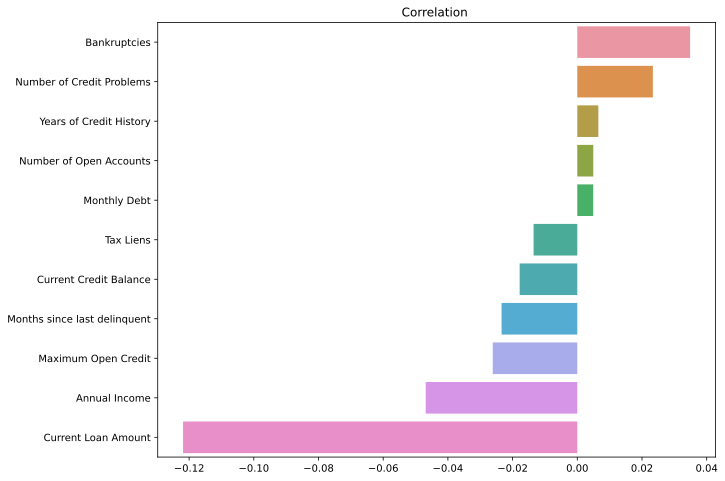

In [28]:
corr_with_target = test[BASE_FEATURE_NAMES ].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation ')
plt.show()

Оценка признаков

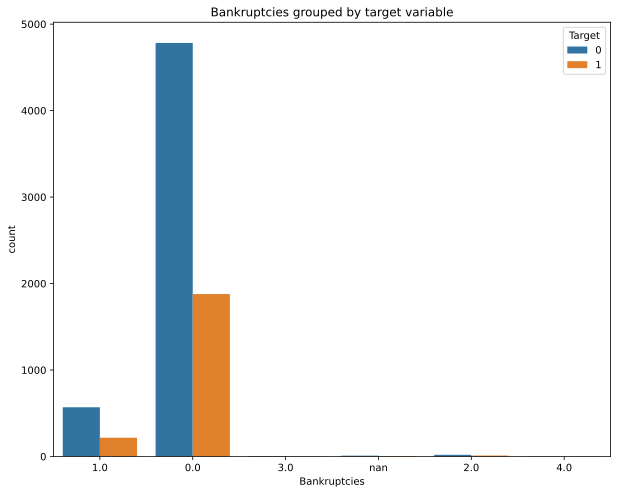

In [29]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Bankruptcies", hue=TARGET_NAME, data=train)
plt.title('Bankruptcies grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Вывод

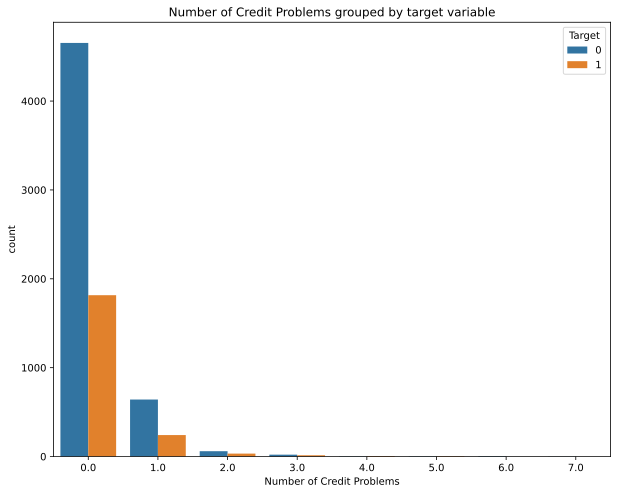

In [30]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Number of Credit Problems", hue=TARGET_NAME, data=train)
plt.title('Number of Credit Problems grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Вывод

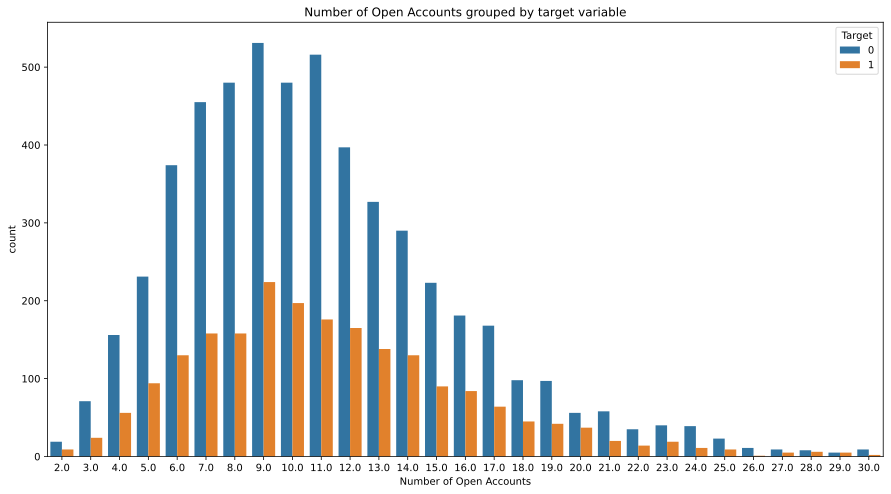

In [31]:
plt.figure(figsize=(15, 8))

sns.countplot(x="Number of Open Accounts", hue=TARGET_NAME, data=train)
plt.title('Number of Open Accounts grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Вывод


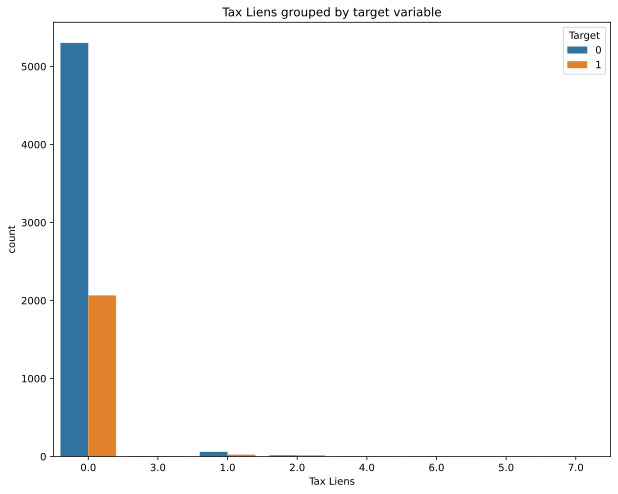

In [32]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Tax Liens", hue=TARGET_NAME, data=train)
plt.title('Tax Liens grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Вывод

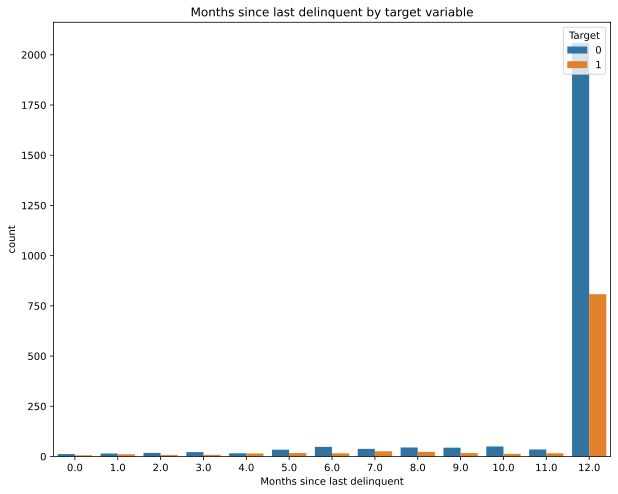

In [33]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Months since last delinquent", hue=TARGET_NAME, data=train)
plt.title('Months since last delinquent by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Вывод

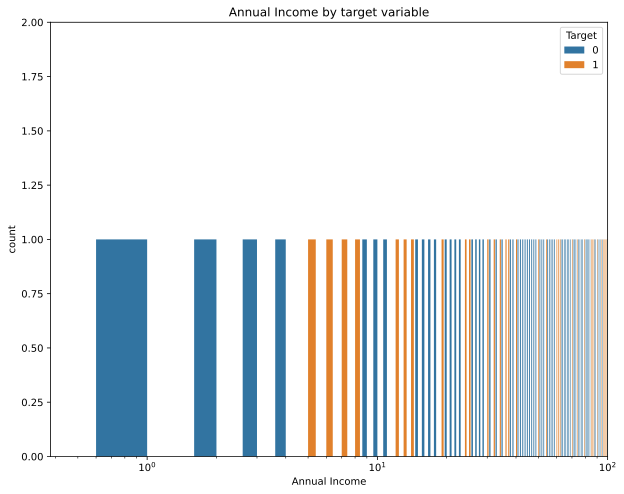

In [34]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Annual Income", hue=TARGET_NAME, data=train)
plt.title('Annual Income by target variable')
plt.legend(title='Target', loc='upper right')
plt.xscale (value = 'log')
plt.axis([0, 100, 0, 2])
plt.show()

Выводы и объединение признаков , если надо

Оценка признака "Annual Income" в разрезе целевой переменной

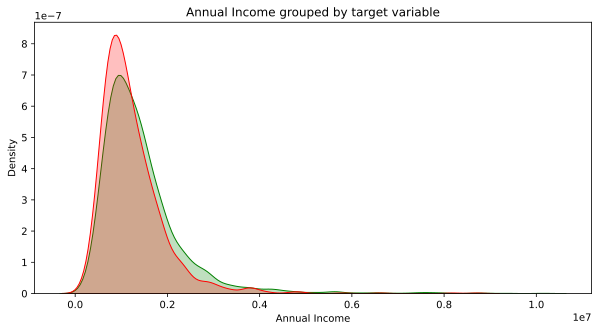

In [78]:
Annual_Income_with_target = train[['Annual Income', TARGET_NAME]]
Annual_Income = limit_bal_with_target['Annual Income']
Annual_Income_target_0 = Annual_Income[Annual_Income_with_target[TARGET_NAME] == 0]
Annual_Income_target_1 = Annual_Income[Annual_Income_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(Annual_Income_target_0, shade=True, label='0', color='g')
sns.kdeplot(Annual_Income_target_1, shade=True, label='1', color='r')

plt.xlabel('Annual Income')
plt.title('Annual Income grouped by target variable')
plt.show()

Вывод +Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка

In [80]:
shapiro(Annual_Income)

ShapiroResult(statistic=nan, pvalue=1.0)

 произведём визуальную оценку распределения признака, а так же построим QQ-график

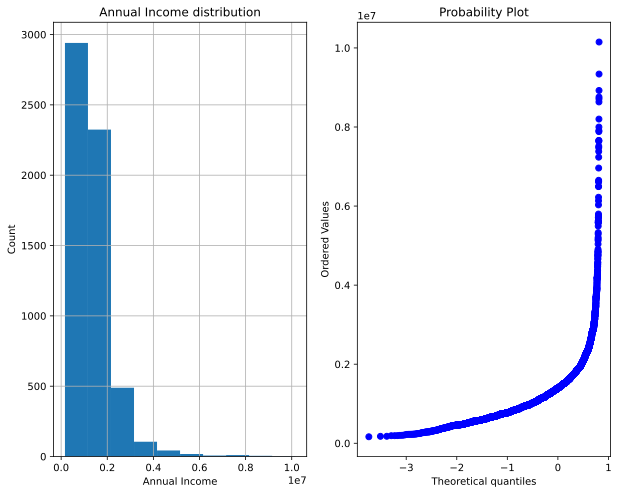

In [82]:
plt.figure(figsize=(10, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Annual Income')
ax1.set_ylabel('Count')
ax1.set_title('Annual Income distribution')
Annual_Income.hist()

plt.subplot(122)
probplot(Annual_Income, dist='norm', plot=plt)

plt.show()

Выводы 

Оценим эквивалентность мат. ожадиний, в исследуемых группах, с помощью критерия Манна-Уитни

In [83]:
mannwhitneyu(Annual_Income_target_0,Annual_Income_target_1)

MannwhitneyuResult(statistic=5534342.5, pvalue=0.031334788783133206)

Для дополнительной проверки обратиться к доверительным интервалам

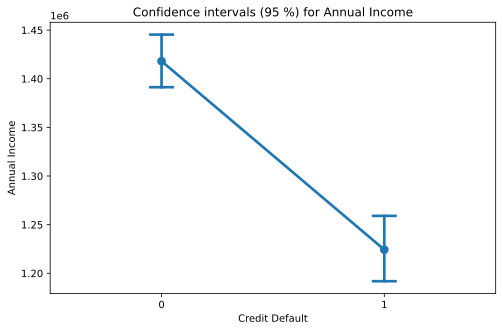

In [84]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Annual Income', data=Annual_Income_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for Annual Income')
plt.show()

Вывод : по данному графику так  видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.

Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.